In [25]:
import pickle 
import torch
import numpy as np


from genepro.multitree import Multitree
from genepro.node_impl import *
import numpy as np


class AdaptiveConstant(Constant):
    def __init__(self, value: float = None):
        super().__init__(value)
        # self.gamma = gamma
        # self.epsilon = epsilon
        self.sigma = (
            1.0  # np.max([np.exp(self.gamma * np.random.randn()), self.epsilon])
        )

    def set_sigma(self, sigma):
        self.sigma = sigma


def coeff_adaptive_mutation(
    multitree: Multitree,
    prob_coeff_mut: float = 0.25,
    gamma: float = 0.1,
    epsilon: float = 1e-16,
) -> Node:
    """
    Applies random coefficient mutations to constant nodes

    Parameters
    ----------
    tree : Node
      the tree to which coefficient mutations are applied
    prob_coeff_mut : float, optional
      the probability with which coefficients are mutated (default is 0.25)
    temp : float, optional
      "temperature" that indicates the strength of coefficient mutation, it is relative to the current value (i.e., v' = v + temp*abs(v)*N(0,1))

    Returns
    -------
    Node
      the tree after coefficient mutation (it is the same as the tree in input)
    """
    r = np.random.randint(multitree.n_trees)
    tree = multitree.children[r]
    coeffs = [n for n in tree.get_subtree() if type(n) == Constant]
    for c in coeffs:
        # decide wheter it should be applied
        if np.random.uniform() < prob_coeff_mut:
            v = c.get_value()
            # update the value by +- sigma*N(0,1)
            new_sigma = np.max([c.sigma * np.exp(gamma * np.random.randn()), epsilon])
            c.set_sigma(new_sigma)

            new_v = v + c.sigma * np.random.randn()

            c.set_value(new_v)

    multitree.children[r] = tree
    return multitree

loaded_results_2 = None
with open("second_results/all_results.pkl", "rb") as f:
    loaded_results_2 = pickle.load(f)

# quickly correct results dict

for i, res in enumerate(loaded_results_2):
    if 'descirption' in res:
        res['description'] = res.pop('descirption')

loaded_results_2

loaded_results_3 = None
with open("third_results/all_results.pkl", "rb") as f:
    loaded_results_3 = pickle.load(f)

# quickly correct results dict

for i, res in enumerate(loaded_results_3):
    if 'descirption' in res:
        res['description'] = res.pop('descirption')

loaded_results_3  

[{'description': 'adaptive mutation, prob:0.5 , gamma:0.1',
  'evo_args': {'internal_nodes': [+, -, *, /, min, max, sin],
   'leaf_nodes': [x_0,
    x_1,
    x_2,
    x_3,
    x_4,
    x_5,
    x_6,
    x_7,
    x_0,
    x_1,
    x_2,
    x_3,
    x_4,
    x_5,
    x_6,
    x_7,
    const?],
   'n_trees': 4,
   'pop_size': 64,
   'max_gens': 100,
   'max_tree_size': 40,
   'coeff_opts': [{'fun': <function __main__.coeff_adaptive_mutation(multitree: genepro.multitree.Multitree, prob_coeff_mut: float = 0.25, gamma: float = 0.1, epsilon: float = 1e-16) -> genepro.node.Node>,
     'rate': 0.5,
     'prob': 0.5,
     'gamma': 0.1,
     'epsilon': 1e-16}],
   'optimization_behavior': 'NONE',
   'batch_size': 64,
   'steps': 10,
   'lr': 0.01,
   'n_jobs': 20,
   'verbose': True,
   'fitness_function': ''},
  0: {'fitness': [-290.11783023156136,
    -453.85892985677344,
    -491.19965678516616,
    -478.6496937901451,
    -424.2916339026112,
    -456.04256665870247,
    -421.03326440281904,
 

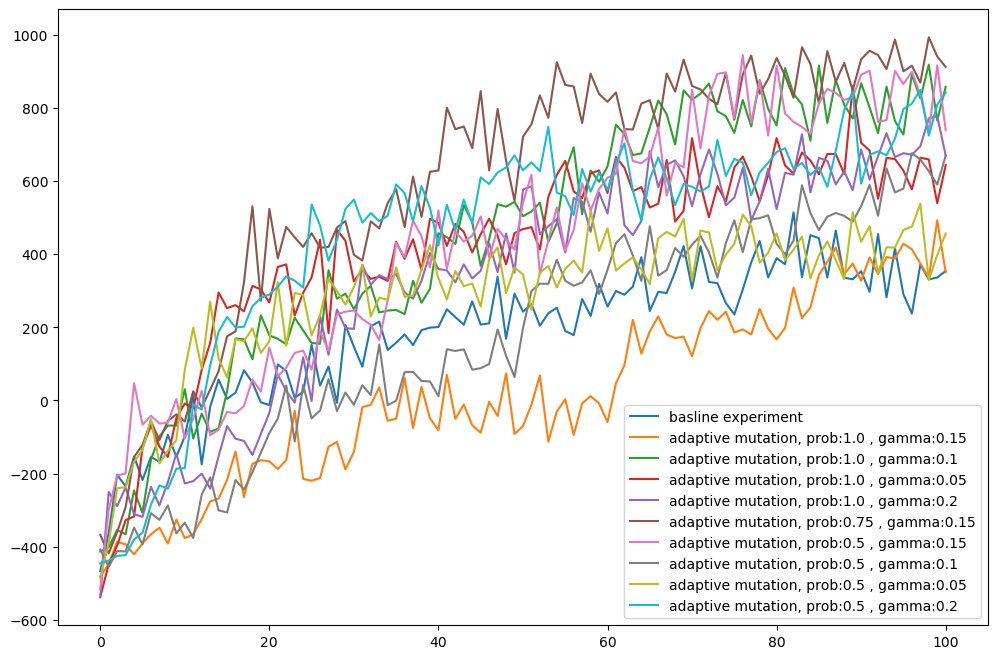

In [26]:
# import tikzplotlib
import matplotlib.pyplot as plt

repetitions = 3 #len(loaded_results[0])
no_of_experiments = len(loaded_results_2)
gens = np.arange(len(loaded_results_2[0][0]['fitness']))
plt.figure(figsize=(12, 8))
for exp in range(no_of_experiments):
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results_2[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results_2[exp]['description'])

no_of_experiments = len(loaded_results_3)
for exp in range(no_of_experiments):
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results_3[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results_3[exp]['description'])
plt.legend()
plt.show()



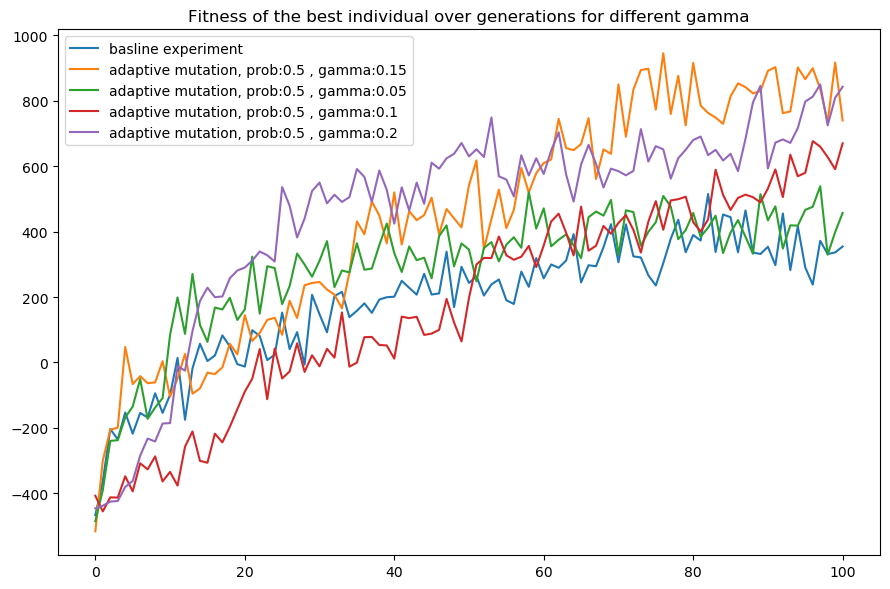

In [30]:
plot_1_exp = [0,6]
plt.figure(figsize=(9, 6))
for exp in plot_1_exp:
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results_2[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results_2[exp]['description'])

plot_1_exp_third = [1,0,2]
for exp in plot_1_exp_third:
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results_3[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results_3[exp]['description']) 


plt.title("Fitness of the best individual over generations for different gamma")
# plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


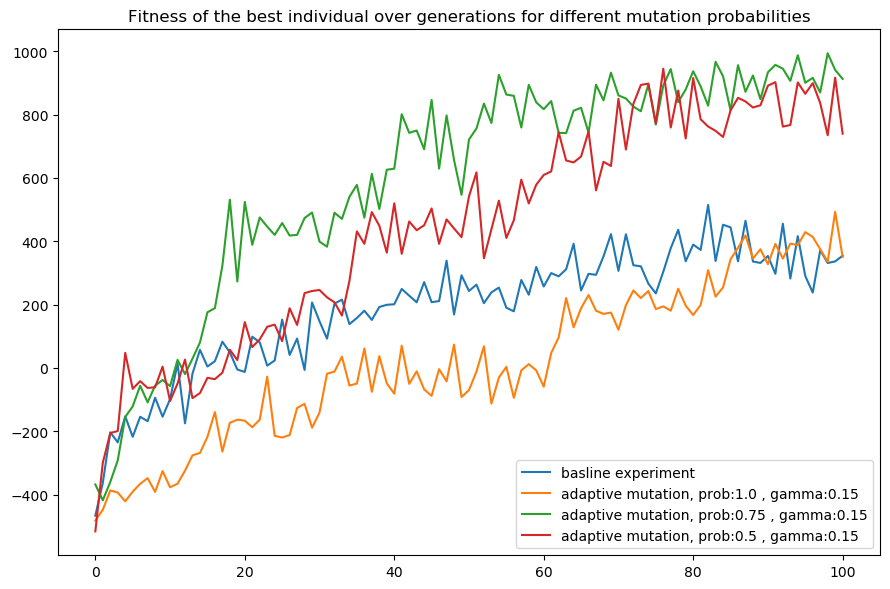

In [28]:
plot_1_exp = [0,1,5,6]
plt.figure(figsize=(9, 6))
for exp in plot_1_exp:
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results_2[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results_2[exp]['description'])

plt.title("Fitness of the best individual over generations for different mutation probabilities")

plt.legend()
plt.tight_layout()
plt.show()